<a href="https://colab.research.google.com/github/saipragathi0912/ADHD_analysis/blob/main/ADHD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
import warnings
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.metrics import mutual_info_score,accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
warnings.filterwarnings("ignore")

In [ ]:
!pip install mne
import mne

# `Data Preprocessing`

In [ ]:
def return_number_of_rows(type_,mat_name):
  data= scipy.io.loadmat('/content/drive/MyDrive/Sem Exam/'+type_+'/'+mat_name)
  string_=''
  for i in mat_name:
    if i!='.':
      string_+=i
    if i=='.':
      break
  data=data[string_]
  return data.shape[0]

In [ ]:
entries_adhd_part1 = os.listdir('/content/drive/MyDrive/Sem Exam/ADHD_part1')
entries_adhd_part2 = os.listdir('/content/drive/MyDrive/Sem Exam/ADHD_part2')
entries_control_part1=os.listdir('/content/drive/MyDrive/Sem Exam/Control_part1')
entries_control_part2=os.listdir('/content/drive/MyDrive/Sem Exam/Control_part2')

In [ ]:
rows=list()
for i in entries_adhd_part1:
  rows.append(return_number_of_rows('ADHD_part1',i))
for i in entries_adhd_part2:
  rows.append(return_number_of_rows('ADHD_part2',i))
for i in entries_control_part1:
  rows.append(return_number_of_rows('Control_part1',i))
for i in entries_control_part2:
  rows.append(return_number_of_rows('Control_part2',i))

In [ ]:
minimum_number_of_rows=min(rows)

In [ ]:
minimum_number_of_rows

7983

In [ ]:
def return_dataframe(type_,part,mat_name):
  data= scipy.io.loadmat('/content/drive/MyDrive/Sem Exam/'+type_+'/'+mat_name)
  string=''
  for i in mat_name:
    if i=='.':
      break
    else:
      string+=i
  data=data[string]
  pd.DataFrame(data).to_csv('data.csv')
  data=pd.read_csv('/content/data.csv')
  data.drop('Unnamed: 0',axis=1,inplace=True)
  labels={'0':'Fp1','1':'Fp2','2':'F3','3':'F4','4':'C3','5':'C4','6':'P3','7':'P4','8':'O1','9':'O2','10':'F7','11':'F8','12':'T7','13':'T8','14':'P7','15':'P8','16':'Fz','17':'Cz','18':'Pz'}
  data_csv=data.rename(labels,axis=1)
  data_csv=data_csv[:minimum_number_of_rows]
  return data_csv

In [ ]:
labels={'0':'Fp1','1':'Fp2','2':'F3','3':'F4','4':'C3','5':'C4','6':'P3','7':'P4','8':'O1','9':'O2','10':'F7','11':'F8','12':'T7','13':'T8','14':'P7','15':'P8','16':'Fz','17':'Cz','18':'Pz'}

In [ ]:
label_column=[labels[str(i)] for i in range(0,19)]

In [ ]:
MIC_ADHD_Scores=list()

In [ ]:
for i in entries_adhd_part1:
  dataframe=return_dataframe('ADHD_part1','part1',i)
  scaler=StandardScaler()
  normalized_dataframe=scaler.fit_transform(dataframe)
  normalized_dataframe=pd.DataFrame(normalized_dataframe,columns=label_column)
  column_=list()
  for i in dataframe.columns:
    row_=list()
    for j in dataframe.columns:
      row_.append(mutual_info_score(normalized_dataframe[i],normalized_dataframe[j]))
    column_.append(row_)
  MIC_ADHD_Scores.append(column_)

In [ ]:
for i in entries_adhd_part2:
  dataframe=return_dataframe('ADHD_part2','part2',i)
  scaler=StandardScaler()
  normalized_dataframe=scaler.fit_transform(dataframe)
  normalized_dataframe=pd.DataFrame(normalized_dataframe,columns=label_column)
  column_=list()
  for i in dataframe.columns:
    row_=list()
    for j in dataframe.columns:
      row_.append(mutual_info_score(normalized_dataframe[i],normalized_dataframe[j]))
    column_.append(row_)
  MIC_ADHD_Scores.append(column_)
  #adhd_dataframe=pd.concat([dataframe,adhd_dataframe])

In [ ]:
MIC_ADHD_Dataframe=pd.DataFrame()
index=0
for array in MIC_ADHD_Scores:
  avg_row=list()
  for i in array:
    avg=sum(i)/len(i)
    avg_row.append(avg)
  MIC_ADHD_Dataframe[index]=avg_row
  index+=1

In [ ]:
MIC_ADHD_Dataframe=MIC_ADHD_Dataframe.T

In [ ]:
MIC_Control_Scores=list()

In [ ]:
for i in entries_control_part1:
  dataframe=return_dataframe('Control_part1','part1',i)
  scaler=StandardScaler()
  normalized_dataframe=scaler.fit_transform(dataframe)
  normalized_dataframe=pd.DataFrame(normalized_dataframe,columns=label_column)
  column_=list()
  for i in dataframe.columns:
    row_=list()
    for j in dataframe.columns:
      row_.append(mutual_info_score(normalized_dataframe[i],normalized_dataframe[j]))
    column_.append(row_)
  MIC_Control_Scores.append(column_)
  #control_dataframe=pd.concat([dataframe,control_dataframe])

In [ ]:
for i in entries_control_part2:
  dataframe=return_dataframe('Control_part2','part2',i)
  scaler=StandardScaler()
  normalized_dataframe=scaler.fit_transform(dataframe)
  normalized_dataframe=pd.DataFrame(normalized_dataframe,columns=label_column)
  column_=list()
  for i in dataframe.columns:
    row_=list()
    for j in dataframe.columns:
      row_.append(mutual_info_score(normalized_dataframe[i],normalized_dataframe[j]))
    column_.append(row_)
  MIC_Control_Scores.append(column_)
  #control_dataframe=pd.concat([dataframe,control_dataframe])

In [ ]:
MIC_Control_Dataframe=pd.DataFrame()
index=0
for array in MIC_Control_Scores:
  avg_row=list()
  for i in array:
    avg=sum(i)/len(i)
    avg_row.append(avg)
  MIC_Control_Dataframe[index]=avg_row
  index+=1

In [ ]:
MIC_Control_Dataframe=MIC_Control_Dataframe.T

In [ ]:
MIC_Control_Dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.533556,0.407173,0.608165,0.612638,0.640661,0.633221,0.451935,0.576979,0.553728,0.528087,0.556294,0.549314,0.600978,0.594996,0.533039,0.556836,0.543005,0.576837,0.554650
1,0.644279,0.683295,0.684821,0.635593,0.621951,0.601831,0.641545,0.519126,0.646893,0.582725,0.646987,0.649224,0.540312,0.601133,0.659870,0.605005,0.651331,0.599394,0.599786
2,0.473806,0.475900,0.503831,0.514722,0.500430,0.515711,0.459670,0.435367,0.393519,0.417647,0.429321,0.463963,0.534828,0.479900,0.396598,0.437641,0.411015,0.472713,0.412962
3,1.240580,1.027744,1.250100,1.129884,1.279279,1.120391,1.192923,1.011761,1.088367,0.975307,1.117137,1.020763,1.258613,1.073925,1.139832,0.926734,1.073999,1.013474,1.099422
4,0.363283,0.386683,0.374321,0.382660,0.359627,0.298312,0.346488,0.332461,0.355501,0.335347,0.358444,0.356711,0.353303,0.354470,0.309593,0.262796,0.385550,0.296194,0.318435
5,0.743503,0.468142,0.604916,0.516082,0.825737,0.495119,0.783866,0.435488,0.740468,0.396673,0.798437,0.413979,0.827546,0.409790,0.783847,0.388708,0.722345,0.415696,0.739170
6,0.632322,0.550824,0.681850,0.477125,0.663751,0.577384,0.606256,0.575329,0.543650,0.552568,0.540578,0.546266,0.653519,0.544953,0.558933,0.496320,0.583342,0.495985,0.550173
7,0.581951,0.614235,0.624612,0.578071,0.609196,0.656623,0.638153,0.609889,0.654757,0.571725,0.630640,0.603198,0.630001,0.618275,0.659128,0.560130,0.627964,0.582889,0.641065
8,0.378432,0.359593,0.335976,0.384514,0.415178,0.363084,0.345301,0.342012,0.367743,0.327638,0.336982,0.350461,0.375357,0.354683,0.325783,0.321837,0.408887,0.359780,0.375686
9,0.382444,0.370829,0.375015,0.355040,0.380652,0.343500,0.363658,0.315799,0.354366,0.324689,0.365243,0.348780,0.365621,0.315917,0.337230,0.300822,0.361078,0.331242,0.346218


In [ ]:
MIC_ADHD_Dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.460172,0.457262,0.424705,0.446676,0.425003,0.408109,0.356684,0.357975,0.444391,0.278662,0.375983,0.328976,0.362036,0.284975,0.211544,0.250477,0.306056,0.314510,0.271406
1,0.482539,0.574929,0.565867,0.604712,0.630327,0.592061,0.605194,0.588615,0.527350,0.523464,0.582243,0.533057,0.570766,0.512511,0.529637,0.486646,0.530088,0.473158,0.495314
2,0.554888,0.326155,0.611931,0.366350,0.639550,0.360334,0.562920,0.348756,0.507571,0.374723,0.670635,0.347868,0.675010,0.379733,0.584109,0.252634,0.596885,0.360787,0.531860
3,0.431437,0.442116,0.444356,0.441368,0.456678,0.436470,0.387919,0.439162,0.233374,0.289210,0.356369,0.359629,0.370060,0.320478,0.358651,0.366644,0.370716,0.372809,0.369661
4,0.446268,0.385899,0.607136,0.604085,0.628450,0.612343,0.590536,0.551488,0.396395,0.366135,0.364185,0.365790,0.477719,0.472333,0.400755,0.496778,0.559508,0.456824,0.507023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.388149,0.399847,0.408075,0.430228,0.371124,0.475021,0.389376,0.451275,0.348184,0.402678,0.356315,0.448947,0.345762,0.422832,0.308860,0.403963,0.380324,0.437488,0.340398
57,0.369480,0.413503,0.370744,0.476167,0.459433,0.484466,0.327741,0.474733,0.235834,0.347894,0.336871,0.389967,0.279500,0.381272,0.226241,0.387137,0.339239,0.407292,0.286316
58,0.309260,0.290974,0.322989,0.281680,0.333939,0.338578,0.358580,0.331558,0.350246,0.240760,0.275932,0.265777,0.329504,0.280618,0.242823,0.175657,0.313609,0.296125,0.305486
59,0.379710,0.422847,0.539102,0.600686,0.398105,0.539112,0.504499,0.441638,0.283356,0.368191,0.485037,0.440647,0.620026,0.489173,0.443368,0.411826,0.583605,0.446936,0.421906


In [ ]:
MIC_Control_Dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.533556,0.407173,0.608165,0.612638,0.640661,0.633221,0.451935,0.576979,0.553728,0.528087,0.556294,0.549314,0.600978,0.594996,0.533039,0.556836,0.543005,0.576837,0.554650
1,0.644279,0.683295,0.684821,0.635593,0.621951,0.601831,0.641545,0.519126,0.646893,0.582725,0.646987,0.649224,0.540312,0.601133,0.659870,0.605005,0.651331,0.599394,0.599786
2,0.473806,0.475900,0.503831,0.514722,0.500430,0.515711,0.459670,0.435367,0.393519,0.417647,0.429321,0.463963,0.534828,0.479900,0.396598,0.437641,0.411015,0.472713,0.412962
3,1.240580,1.027744,1.250100,1.129884,1.279279,1.120391,1.192923,1.011761,1.088367,0.975307,1.117137,1.020763,1.258613,1.073925,1.139832,0.926734,1.073999,1.013474,1.099422
4,0.363283,0.386683,0.374321,0.382660,0.359627,0.298312,0.346488,0.332461,0.355501,0.335347,0.358444,0.356711,0.353303,0.354470,0.309593,0.262796,0.385550,0.296194,0.318435
5,0.743503,0.468142,0.604916,0.516082,0.825737,0.495119,0.783866,0.435488,0.740468,0.396673,0.798437,0.413979,0.827546,0.409790,0.783847,0.388708,0.722345,0.415696,0.739170
6,0.632322,0.550824,0.681850,0.477125,0.663751,0.577384,0.606256,0.575329,0.543650,0.552568,0.540578,0.546266,0.653519,0.544953,0.558933,0.496320,0.583342,0.495985,0.550173
7,0.581951,0.614235,0.624612,0.578071,0.609196,0.656623,0.638153,0.609889,0.654757,0.571725,0.630640,0.603198,0.630001,0.618275,0.659128,0.560130,0.627964,0.582889,0.641065
8,0.378432,0.359593,0.335976,0.384514,0.415178,0.363084,0.345301,0.342012,0.367743,0.327638,0.336982,0.350461,0.375357,0.354683,0.325783,0.321837,0.408887,0.359780,0.375686
9,0.382444,0.370829,0.375015,0.355040,0.380652,0.343500,0.363658,0.315799,0.354366,0.324689,0.365243,0.348780,0.365621,0.315917,0.337230,0.300822,0.361078,0.331242,0.346218


In [ ]:
Global_minimum_for_ahdc=list()
for i in MIC_ADHD_Dataframe.columns:
  Global_minimum_for_ahdc.append(min(list(MIC_ADHD_Dataframe[i])))

In [ ]:
Global_minimum_for_control=list()
for i in MIC_ADHD_Dataframe.columns:
  Global_minimum_for_control.append(min(list(MIC_Control_Dataframe[i])))

# `Topoplot for Global minimum`

In [ ]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
fake_info = mne.create_info(ch_names=label_column, sfreq=250.,
                            ch_types='eeg')
rng = np.random.RandomState(0)
data = rng.normal(size=(len(label_column), 1)) * 1e-6
fake_evoked = mne.EvokedArray(data, fake_info)
fake_evoked.set_montage(biosemi_montage)

<Evoked | '' (average, N=1), 0 – 0 sec, baseline off, 19 ch, ~33 kB>

In [ ]:
montage_head = fake_evoked.get_montage()
ch_pos = montage_head.get_positions()['ch_pos']
pos = np.stack([ch_pos[ch] for ch in label_column])
radius = np.abs(pos[[2, 3], 0]).mean()
x = pos[0, 0]
y = pos[-1, 1]
z = pos[:, -1].mean()
print([f'{v:0.5f}' for v in [x, y, z, radius]])

['-0.02934', '-0.06834', '0.06730', '0.05178']


Text(0.5, 1.0, 'Control')

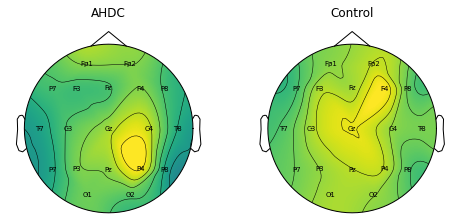

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4), gridspec_kw=dict(top=0.9),
                       sharex=True, sharey=True)

mne.viz.plot_topomap(Global_minimum_for_ahdc, fake_evoked.info, axes=ax[0],cmap='viridis',show=False,names=label_column,show_names=True)
mne.viz.plot_topomap(Global_minimum_for_control, fake_evoked.info, axes=ax[1],cmap='viridis',show=False,names=label_column,show_names=True)
ax[0].set_title('AHDC')
ax[1].set_title('Control')

In [ ]:
pca_=PCA(n_components=2)

In [ ]:
MIC_ADHD_Dataframe['Label']=[1 for i in range(MIC_ADHD_Dataframe.shape[0])]
MIC_Control_Dataframe['Label']=[0 for i in range(MIC_Control_Dataframe.shape[0])]

In [ ]:
MIC_final=pd.concat([MIC_ADHD_Dataframe,MIC_Control_Dataframe])

In [ ]:
MIC_final.reset_index(inplace=True)

In [ ]:
MIC_final.drop(['index'],axis=1,inplace=True)

# `Finding optimal number of components for PCA`

In [ ]:
features=[i for i in MIC_final if i!='Label']

In [ ]:
X=MIC_final[features]

In [ ]:
pca_with_2_components=pca_.fit_transform(X)

In [ ]:
pca_with_2_components=pd.DataFrame(pca_with_2_components,columns=["P1","P2"])

In [ ]:
pca_with_2_components

,P1,P2
0,-0.330462,-0.023961
1,0.507964,0.063688
2,0.248061,-0.473924
3,-0.219435,0.047274
4,0.252337,0.038495
...,...,...
116,-0.629891,-0.024150
117,-0.114262,-0.036587
118,-0.670725,-0.056379
119,0.469929,0.171088


In [ ]:
pca_with_2_components['Label']=MIC_final['Label']

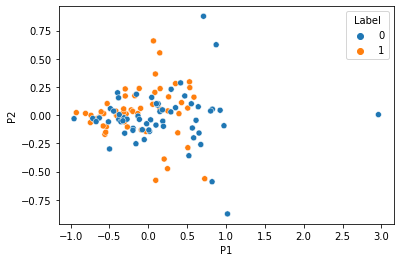

In [ ]:
import seaborn as sns
sns.scatterplot(data=pca_with_2_components,x='P1',y='P2',hue='Label')

Therefore, the given data is not linearly separable when the number of dimensions is 2

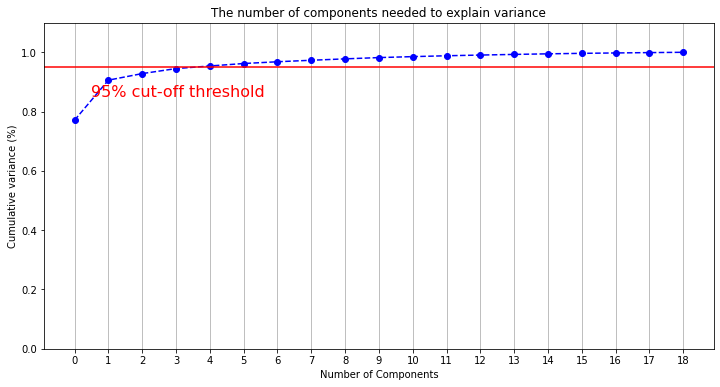

In [ ]:
pca = PCA().fit(X)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(0, 19, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 19, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
optimal_pca=PCA(n_components=7)

In [ ]:
X=MIC_final[features]

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.460172,0.457262,0.424705,0.446676,0.425003,0.408109,0.356684,0.357975,0.444391,0.278662,0.375983,0.328976,0.362036,0.284975,0.211544,0.250477,0.306056,0.314510,0.271406
1,0.482539,0.574929,0.565867,0.604712,0.630327,0.592061,0.605194,0.588615,0.527350,0.523464,0.582243,0.533057,0.570766,0.512511,0.529637,0.486646,0.530088,0.473158,0.495314
2,0.554888,0.326155,0.611931,0.366350,0.639550,0.360334,0.562920,0.348756,0.507571,0.374723,0.670635,0.347868,0.675010,0.379733,0.584109,0.252634,0.596885,0.360787,0.531860
3,0.431437,0.442116,0.444356,0.441368,0.456678,0.436470,0.387919,0.439162,0.233374,0.289210,0.356369,0.359629,0.370060,0.320478,0.358651,0.366644,0.370716,0.372809,0.369661
4,0.446268,0.385899,0.607136,0.604085,0.628450,0.612343,0.590536,0.551488,0.396395,0.366135,0.364185,0.365790,0.477719,0.472333,0.400755,0.496778,0.559508,0.456824,0.507023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,0.389418,0.363067,0.297608,0.345138,0.253484,0.305402,0.274768,0.290901,0.222186,0.286082,0.357862,0.261725,0.303925,0.219097,0.201936,0.183617,0.357093,0.308824,0.245408
117,0.493929,0.482957,0.465008,0.425016,0.424377,0.442432,0.418163,0.402503,0.343325,0.341515,0.452986,0.357056,0.484984,0.345099,0.345260,0.270082,0.362310,0.425326,0.402578
118,0.342424,0.299340,0.338799,0.330498,0.321275,0.294006,0.289052,0.278982,0.215978,0.240312,0.296826,0.192257,0.279088,0.248070,0.216479,0.231475,0.318145,0.277487,0.245635
119,0.645028,0.562553,0.627481,0.582732,0.591751,0.599194,0.626127,0.644794,0.390957,0.567695,0.520613,0.485180,0.507625,0.584895,0.339653,0.503549,0.505653,0.503269,0.517765


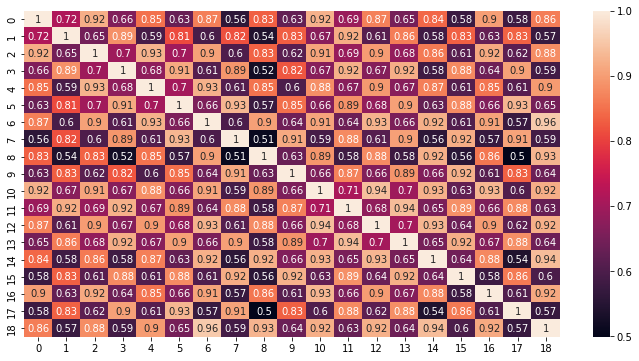

In [ ]:
sns.heatmap(X.corr(),annot=True)

In [ ]:
X_P=optimal_pca.fit_transform(X)
X_P=pd.DataFrame(X_P,columns=['P1','P2','P3','P4','P5','P6','P7'])
X_P

,P1,P2,P3,P4,P5,P6,P7
0,-0.330462,-0.023961,0.093300,-0.018760,-0.072768,-0.109238,-0.058277
1,0.507964,0.063688,-0.064298,0.040977,-0.009388,-0.055478,-0.027015
2,0.248061,-0.473924,-0.022881,0.024653,0.084610,0.053399,0.023784
3,-0.219435,0.047274,0.045662,0.059085,0.012727,-0.052088,0.044654
4,0.252337,0.038495,0.000085,0.282938,-0.051543,-0.017913,0.106458
...,...,...,...,...,...,...,...
116,-0.629891,-0.024150,0.060788,-0.081958,-0.021493,0.071121,0.010702
117,-0.114262,-0.036587,0.060632,-0.013526,-0.013852,0.015393,-0.028056
118,-0.670725,-0.056379,0.021359,0.021960,0.010146,-0.002360,0.061678
119,0.469929,0.171088,0.067000,0.060307,-0.122909,-0.037934,0.156120


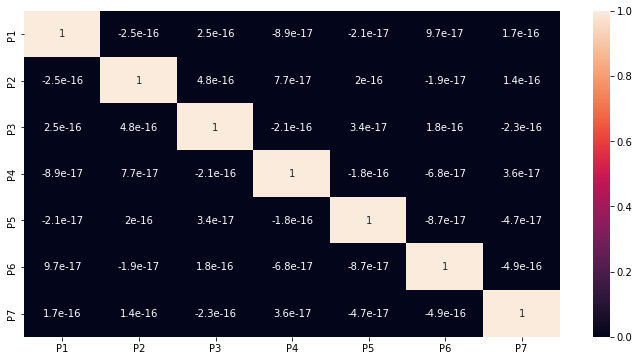

In [ ]:
sns.heatmap(X_P.corr(),annot=True)

# `Training Models`

In [ ]:
classifier_and_performance_without_pca={}
Maximum_Indices_without_pca={}
classifier_and_performance_with_pca={}
Maximum_Indices_with_pca={}

In [ ]:
def plot_roc_curve(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc=roc_auc_score(y_test,y_pred)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.title("ROC curve")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def grid_search_cv(clf,parameters,X,y,pca=False):
  strat=StratifiedKFold(n_splits=4,shuffle=True,random_state=42)
  max=0.0
  max_indices=[0,0]
  for train_index,test_index in strat.split(X,y):
    X_train,y_train=X.iloc[train_index],y.iloc[train_index]
    X_test,y_test=X.iloc[test_index],y.iloc[test_index]
    grid_cv=GridSearchCV(clf,parameters,scoring='precision',cv=5)
    grid_cv.fit(X_train,y_train)
    predictions=grid_cv.predict(X_test)
    temp=f1_score(y_test,predictions)
    if(temp>max):
      max=temp
      max_accuracy=accuracy_score(y_test,predictions)
      max_recall=recall_score(y_test,predictions)
      max_precision=precision_score(y_test,predictions)
      max_clf=grid_cv.best_params_
      max_indices[0]=train_index
      max_indices[1]=test_index
  if pca:
    classifier_and_performance_with_pca[clf]={'Best_Parameters':max_clf,'Accuracy':max_accuracy,'Recall':max_recall,'Precision':max_precision,'F1-Score':max}
  else:
    classifier_and_performance_without_pca[clf]={'Best_Parameters':max_clf,'Accuracy':max_accuracy,'Recall':max_recall,'Precision':max_precision,'F1-Score':max}
  return max_indices

`Perceptron`
-----------------------------------------------------------------------------------------------------

Without Applying PCA to data

In [ ]:
perceptron=Perceptron()
parameters={'penalty':['l1','l2','elasticnet','None'],'alpha':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.0],'max_iter':[100,500,1000,1500,2000,2500]}
max_index_for_perceptron=grid_search_cv(perceptron,parameters,X,y)
Maximum_Indices_without_pca['Perceptron']=max_index_for_perceptron
classifier_and_performance_without_pca[perceptron]

{'Accuracy': 0.6333333333333333,
 'Best_Parameters': {'alpha': 0.001, 'max_iter': 100, 'penalty': 'l1'},
 'F1-Score': 0.7179487179487181,
 'Precision': 0.5833333333333334,
 'Recall': 0.9333333333333333}

In [ ]:
best_model=Perceptron(alpha=0.01,max_iter=100,penalty='l1')
best_model.fit(X.iloc[Maximum_Indices_without_pca['Perceptron'][0]],y.iloc[Maximum_Indices_without_pca['Perceptron'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['Perceptron'][1]]),y.iloc[Maximum_Indices_without_pca['Perceptron'][1]])

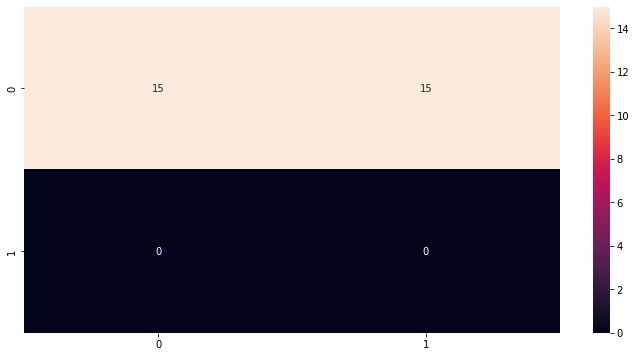

In [ ]:
sns.heatmap(cm1,annot=True)

After Applying PCA to data

In [ ]:
perceptron=Perceptron()
parameters={'penalty':['l1','l2','elasticnet','None'],'alpha':[0.1,0.01,0.001,0.0001,0.00001,1.0,0.0],'max_iter':[1000,1500,2000,2500]}
max_index_for_perceptron=grid_search_cv(perceptron,parameters,X_P,y,pca=True)
Maximum_Indices_with_pca['Perceptron']=max_index_for_perceptron

In [ ]:
classifier_and_performance_with_pca[perceptron]

{'Accuracy': 0.8,
 'Best_Parameters': {'alpha': 1e-05, 'max_iter': 1000, 'penalty': 'l2'},
 'F1-Score': 0.8235294117647058,
 'Precision': 0.7368421052631579,
 'Recall': 0.9333333333333333}

In [ ]:
best_model=Perceptron(alpha=1e-5,max_iter=1000,penalty='l2')
best_model.fit(X.iloc[Maximum_Indices_with_pca['Perceptron'][0]],y.iloc[Maximum_Indices_with_pca['Perceptron'][0]])
cm2=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_with_pca['Perceptron'][1]]),y.iloc[Maximum_Indices_with_pca['Perceptron'][1]])

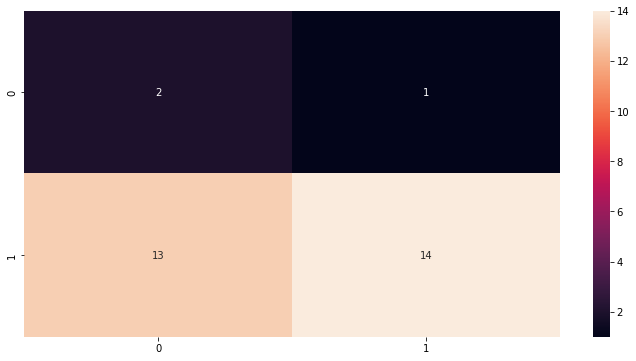

In [ ]:
sns.heatmap(cm2,annot=True)

Best accuracy is achieved when PCA is applied to data. Therefore, ROC curve for that model is alone plotted

In [ ]:
y_pred=best_model.predict(X.iloc[Maximum_Indices_with_pca['Perceptron'][1]])
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test=list(y.iloc[Maximum_Indices_with_pca['Perceptron'][1]])
y_test

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

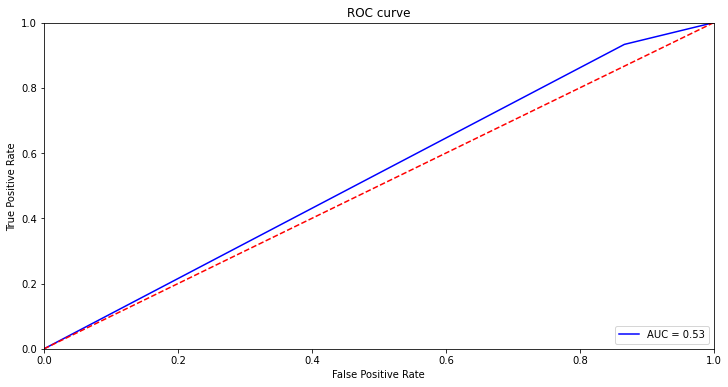

In [ ]:
plot_roc_curve(y_test,y_pred)

`Logistic Regression`
----------------------------------------------------------------------------------------------------------------------------

Before applying PCA to data

In [ ]:
logistic_regression=LogisticRegression()
parameters={'penalty':['l2'],'C':[0.1,0.01,0.001,0.0001,10.0,5.0],'max_iter':[100,1000,1500,2000,2500]}
max_index_for_logistic_regression=grid_search_cv(logistic_regression,parameters,X,y)
Maximum_Indices_without_pca['LogisticRegression']=max_index_for_logistic_regression

In [ ]:
classifier_and_performance_without_pca[logistic_regression]

{'Accuracy': 0.8333333333333334,
 'Best_Parameters': {'C': 10.0, 'max_iter': 100, 'penalty': 'l2'},
 'F1-Score': 0.8387096774193549,
 'Precision': 0.8125,
 'Recall': 0.8666666666666667}

In [ ]:
best_model=LogisticRegression(C=10.0,max_iter=100,penalty='l2')
best_model.fit(X.iloc[Maximum_Indices_without_pca['LogisticRegression'][0]],y.iloc[Maximum_Indices_without_pca['LogisticRegression'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['LogisticRegression'][1]]),y.iloc[Maximum_Indices_without_pca['LogisticRegression'][1]])

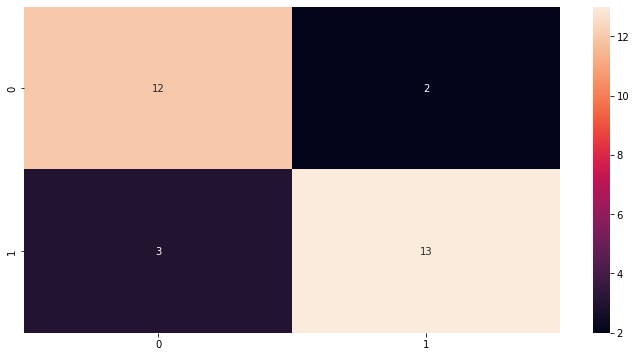

In [ ]:
sns.heatmap(cm1,annot=True)

After applying PCA to data

In [ ]:
logistic_regression=LogisticRegression()
parameters={'penalty':['l2'],'C':[0.1,0.01,0.001,0.0001,10.0,5.0],'max_iter':[1000,1500,2000,2500]}
max_index_for_logistic_regression=grid_search_cv(logistic_regression,parameters,X_P,y,pca=True)
Maximum_Indices_with_pca['LogisticRegression']=max_index_for_logistic_regression

In [ ]:
classifier_and_performance_with_pca[logistic_regression]

{'Accuracy': 0.7666666666666667,
 'Best_Parameters': {'C': 5.0, 'max_iter': 1000, 'penalty': 'l2'},
 'F1-Score': 0.8,
 'Precision': 0.7,
 'Recall': 0.9333333333333333}

In [ ]:
best_model_pca=LogisticRegression(C=5.0,max_iter=1000,penalty='l2')
best_model_pca.fit(X.iloc[Maximum_Indices_with_pca['LogisticRegression'][0]],y.iloc[Maximum_Indices_with_pca['LogisticRegression'][0]])
cm2=confusion_matrix(best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['LogisticRegression'][1]]),y.iloc[Maximum_Indices_with_pca['LogisticRegression'][1]])

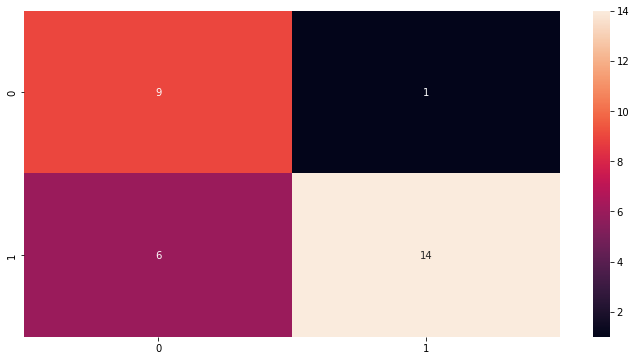

In [ ]:
sns.heatmap(cm2,annot=True)

Here, the original data gives good performance metrics. So, that data is used  to plot ROC Curve 

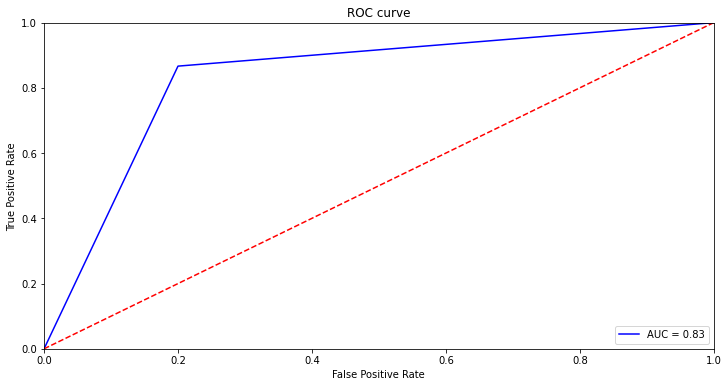

In [ ]:
y_test=list(y.iloc[Maximum_Indices_without_pca['LogisticRegression'][1]])
y_pred=best_model.predict(X.iloc[Maximum_Indices_without_pca['LogisticRegression'][1]])
plot_roc_curve(y_test,y_pred)

`K Nearest Neighbors`
------------------------------------------------------------------------------------

In [ ]:
knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6,7],'weights':['uniform','distance'],'p':[1,2]}
max_index_for_knn=grid_search_cv(knn,parameters,X,y)
Maximum_Indices_without_pca['KNearestNeighbours']=max_index_for_knn
classifier_and_performance_without_pca[knn]

{'Accuracy': 0.7666666666666667,
 'Best_Parameters': {'n_neighbors': 6, 'p': 2, 'weights': 'uniform'},
 'F1-Score': 0.7586206896551724,
 'Precision': 0.7857142857142857,
 'Recall': 0.7333333333333333}

In [ ]:
best_model=KNeighborsClassifier(n_neighbors=6,p=2,weights='uniform')
best_model.fit(X.iloc[Maximum_Indices_without_pca['KNearestNeighbours'][0]],y.iloc[Maximum_Indices_without_pca['KNearestNeighbours'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['KNearestNeighbours'][1]]),y.iloc[Maximum_Indices_without_pca['KNearestNeighbours'][1]])

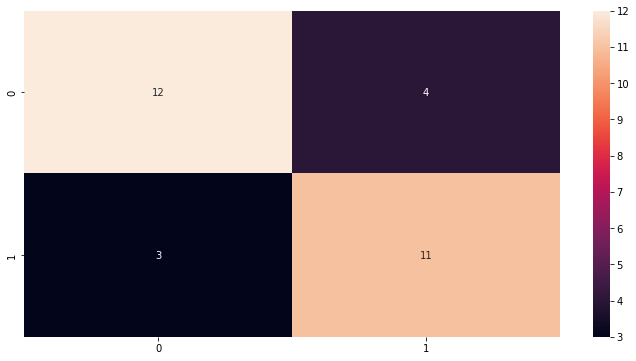

In [ ]:
sns.heatmap(cm1,annot=True)

In [ ]:
knn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6,7],'weights':['uniform','distance'],'p':[1,2]}
max_index_for_knn=grid_search_cv(knn,parameters,X_P,y,pca=True)
Maximum_Indices_with_pca['KNearestNeighbours']=max_index_for_knn
classifier_and_performance_with_pca[knn]

{'Accuracy': 0.7,
 'Best_Parameters': {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'},
 'F1-Score': 0.6666666666666665,
 'Precision': 0.75,
 'Recall': 0.6}

In [ ]:
best_model_pca=KNeighborsClassifier(n_neighbors=4,p=2,weights='uniform')
best_model_pca.fit(X.iloc[Maximum_Indices_with_pca['KNearestNeighbours'][0]],y.iloc[Maximum_Indices_with_pca['KNearestNeighbours'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_with_pca['KNearestNeighbours'][1]]),y.iloc[Maximum_Indices_with_pca['KNearestNeighbours'][1]])

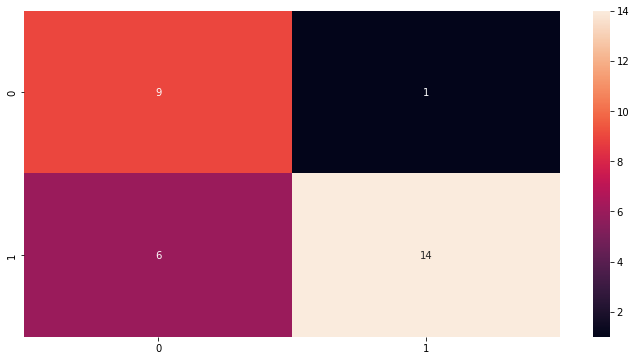

In [ ]:
sns.heatmap(cm2,annot=True)

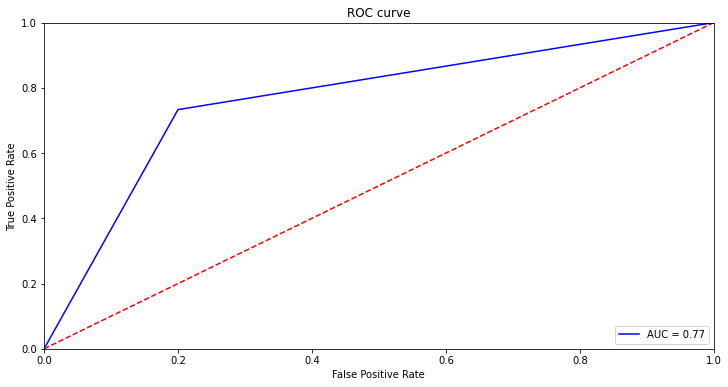

In [ ]:
y_test=list(y.iloc[Maximum_Indices_without_pca['KNearestNeighbours'][1]])
y_pred=best_model.predict(X.iloc[Maximum_Indices_without_pca['KNearestNeighbours'][1]])
plot_roc_curve(y_test,y_pred)

`Support Vector Machines`
-----------------------------------------------------------------------------------------

Before applying PCA to data

In [ ]:
svc=SVC()
parameters={'C':[1.0,2.0,.01,0.001,0.1,10.0],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[1.0,2.0,3.0]}
max_index_for_svm=grid_search_cv(svc,parameters,X,y)
Maximum_Indices_without_pca['SVM']=max_index_for_svm
classifier_and_performance_without_pca[svc]

{'Accuracy': 0.7741935483870968,
 'Best_Parameters': {'C': 10.0, 'gamma': 2.0, 'kernel': 'poly'},
 'F1-Score': 0.787878787878788,
 'Precision': 0.7647058823529411,
 'Recall': 0.8125}

In [ ]:
best_model=SVC(C=10.0,gamma=2.0,kernel='poly')
best_model.fit(X.iloc[Maximum_Indices_without_pca['SVM'][0]],y.iloc[Maximum_Indices_without_pca['SVM'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['SVM'][1]]),y.iloc[Maximum_Indices_without_pca['SVM'][1]])

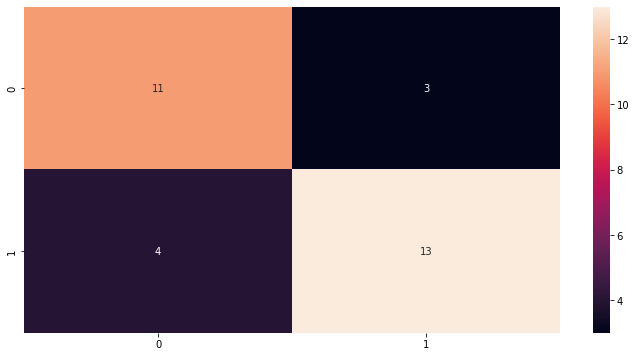

In [ ]:
sns.heatmap(cm1,annot=True)

After applying PCA to data

In [ ]:
svc=SVC()
parameters={'C':[1.0,2.0,.01,0.001,0.1,10.0],'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'gamma':[1.0,2.0,3.0]}
max_index_for_svm=grid_search_cv(svc,parameters,X_P,y,pca=True)
Maximum_Indices_with_pca['SVM']=max_index_for_svm
classifier_and_performance_with_pca[svc]

{'Accuracy': 0.7333333333333333,
 'Best_Parameters': {'C': 10.0, 'gamma': 2.0, 'kernel': 'rbf'},
 'F1-Score': 0.7333333333333333,
 'Precision': 0.7333333333333333,
 'Recall': 0.7333333333333333}

In [ ]:
best_model_pca=SVC(C=10.0,gamma=2.0,kernel='rbf')
best_model_pca.fit(X.iloc[Maximum_Indices_with_pca['SVM'][0]],y.iloc[Maximum_Indices_with_pca['SVM'][0]])
cm2=confusion_matrix(best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['SVM'][1]]),y.iloc[Maximum_Indices_with_pca['SVM'][1]])

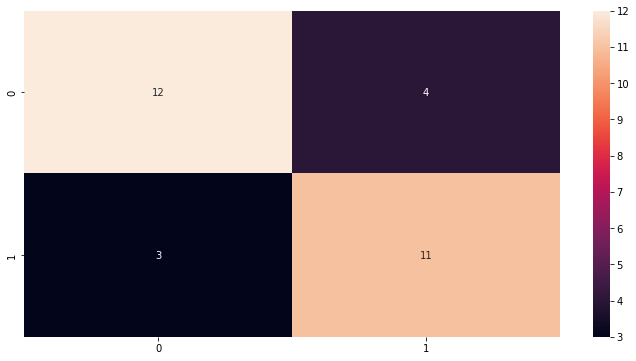

In [ ]:
sns.heatmap(cm2,annot=True)

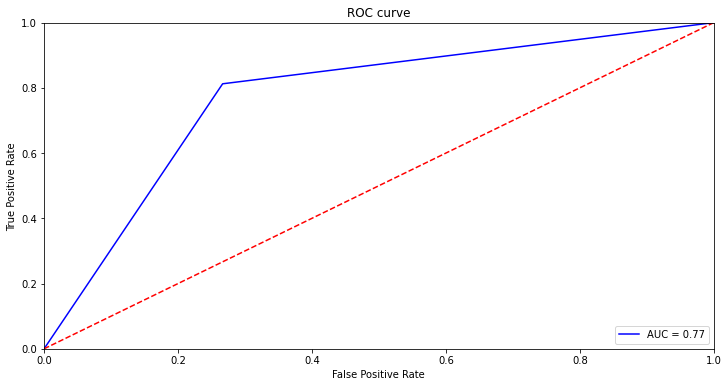

In [ ]:
y_test=list(y.iloc[Maximum_Indices_without_pca['SVM'][1]])
y_pred=best_model.predict(X.iloc[Maximum_Indices_without_pca['SVM'][1]])
plot_roc_curve(y_test,y_pred)

`Gaussian Naive Bayes`
-----------------------------------------------------------------------------------------

Before applying PCA to data

In [ ]:
gaussian=GaussianNB()
max_index_for_gaussian_nb=grid_search_cv(gaussian,{},X,y)
Maximum_Indices_without_pca['GaussianNB']=max_index_for_gaussian_nb
classifier_and_performance_without_pca[gaussian]

{'Accuracy': 0.6333333333333333,
 'Best_Parameters': {},
 'F1-Score': 0.6857142857142857,
 'Precision': 0.6,
 'Recall': 0.8}

In [ ]:
best_model=GaussianNB()
best_model.fit(X.iloc[Maximum_Indices_without_pca['GaussianNB'][0]],y.iloc[Maximum_Indices_without_pca['GaussianNB'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['GaussianNB'][1]]),y.iloc[Maximum_Indices_without_pca['GaussianNB'][1]])

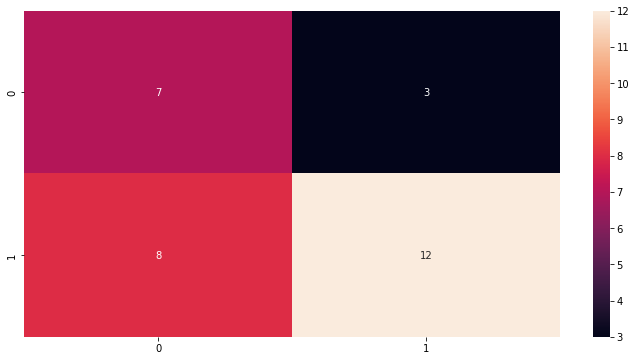

In [ ]:
sns.heatmap(cm1,annot=True)

After applying PCA to data 

In [ ]:
gaussian=GaussianNB()
max_index_for_gaussian_nb=grid_search_cv(gaussian,{},X_P,y,pca=True)
Maximum_Indices_with_pca['GaussianNB']=max_index_for_gaussian_nb
classifier_and_performance_with_pca[gaussian]

{'Accuracy': 0.6666666666666666,
 'Best_Parameters': {},
 'F1-Score': 0.7222222222222222,
 'Precision': 0.6190476190476191,
 'Recall': 0.8666666666666667}

In [ ]:
best_model_pca=GaussianNB()
best_model_pca.fit(X.iloc[Maximum_Indices_with_pca['GaussianNB'][0]],y.iloc[Maximum_Indices_with_pca['GaussianNB'][0]])
cm2=confusion_matrix(best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['GaussianNB'][1]]),y.iloc[Maximum_Indices_with_pca['GaussianNB'][1]])

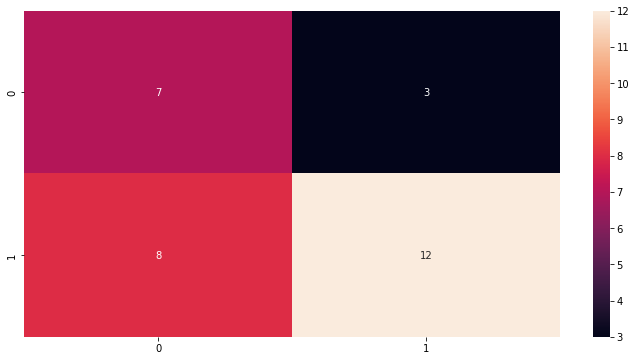

In [ ]:
sns.heatmap(cm2,annot=True)

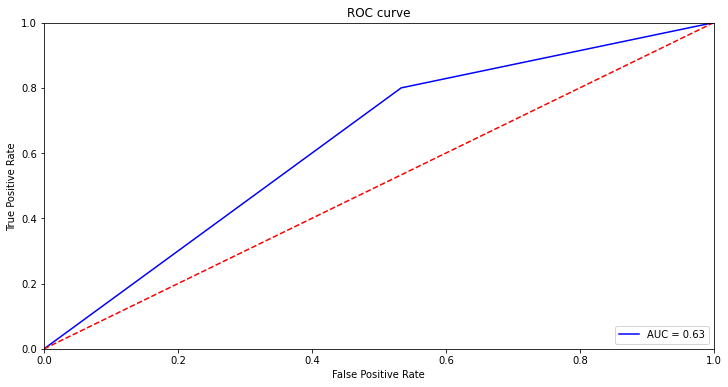

In [ ]:
y_test=list(y.iloc[Maximum_Indices_with_pca['GaussianNB'][1]])
y_pred=best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['GaussianNB'][1]])
plot_roc_curve(y_test,y_pred)

`Bernoulli Naive Bayes`
-----------------------------------------------------------------------------------------

Before applying PCA to data

In [ ]:
bernoulli_nb=BernoulliNB()
parameters={'alpha':[0.0,1.0,2.0,0.5,2.5,10.0,5.0]}
max_index_for_bernoulli_nb=grid_search_cv(bernoulli_nb,parameters,X,y)
Maximum_Indices_without_pca['BernoulliNB']=max_index_for_bernoulli_nb
classifier_and_performance_without_pca[bernoulli_nb]

{'Accuracy': 0.5,
 'Best_Parameters': {'alpha': 0.0},
 'F1-Score': 0.6666666666666666,
 'Precision': 0.5,
 'Recall': 1.0}

In [ ]:
best_model=BernoulliNB(alpha=0.0)
best_model.fit(X.iloc[Maximum_Indices_without_pca['BernoulliNB'][0]],y.iloc[Maximum_Indices_without_pca['BernoulliNB'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['BernoulliNB'][1]]),y.iloc[Maximum_Indices_without_pca['BernoulliNB'][1]])

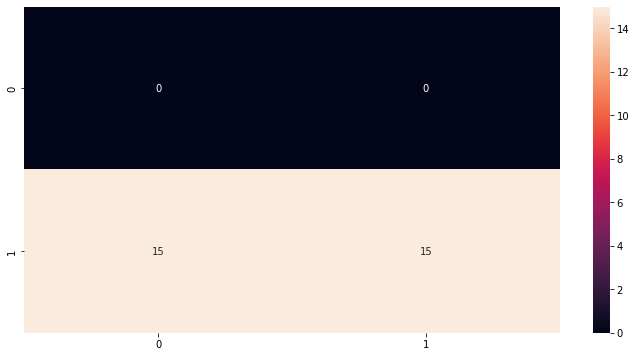

In [ ]:
sns.heatmap(cm1,annot=True)

After applying PCA to data

In [ ]:
bernoulli_nb=BernoulliNB()
parameters={'alpha':[0.0,1.0,2.0,0.5,2.5,10.0,5.0]}
max_index_for_bernoulli_nb=grid_search_cv(bernoulli_nb,parameters,X_P,y,pca=True)
Maximum_Indices_with_pca['BernoulliNB']=max_index_for_bernoulli_nb
classifier_and_performance_with_pca[bernoulli_nb]

{'Accuracy': 0.7,
 'Best_Parameters': {'alpha': 10.0},
 'F1-Score': 0.7567567567567568,
 'Precision': 0.6363636363636364,
 'Recall': 0.9333333333333333}

In [ ]:
best_model_pca=BernoulliNB(alpha=10.0)
best_model_pca.fit(X.iloc[Maximum_Indices_with_pca['BernoulliNB'][0]],y.iloc[Maximum_Indices_with_pca['BernoulliNB'][0]])
cm2=confusion_matrix(best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['BernoulliNB'][1]]),y.iloc[Maximum_Indices_with_pca['BernoulliNB'][1]])

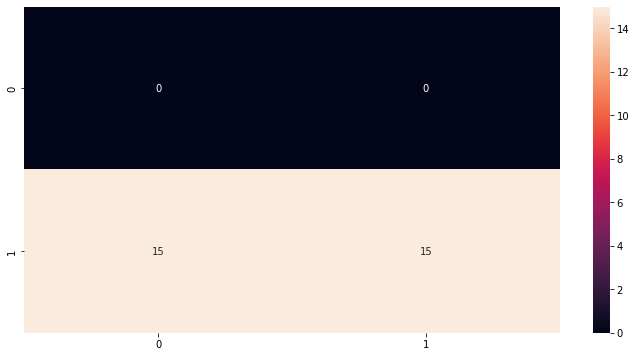

In [ ]:
sns.heatmap(cm2,annot=True)

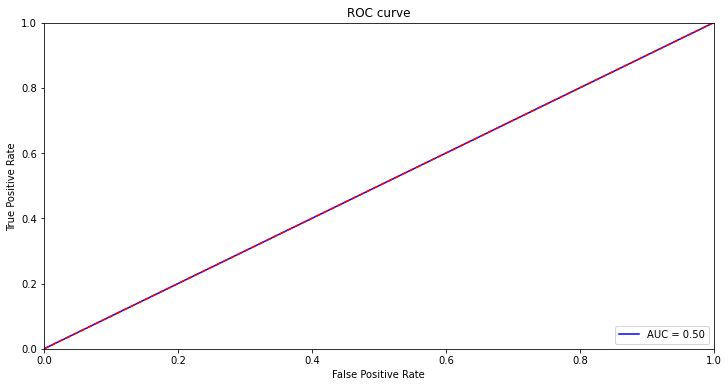

In [ ]:
y_test=list(y.iloc[Maximum_Indices_with_pca['BernoulliNB'][1]])
y_pred=best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['BernoulliNB'][1]])
plot_roc_curve(y_test,y_pred)

`Decision Tree Classifier`
------------------------------------------------------------------------------------------

Before applying PCA to data

In [ ]:
decision_tree=DecisionTreeClassifier()
parameters={'criterion':['gini', 'entropy'],
                       'max_depth': [4, 5, 6, 7, 10, 12, 15],
                       'min_samples_split':[2, 3, 4]}
max_index_for_decision_tree=grid_search_cv(decision_tree,parameters,X,y)
Maximum_Indices_without_pca['Decision_Tree']=max_index_for_decision_tree
classifier_and_performance_without_pca[decision_tree]

{'Accuracy': 0.6333333333333333,
 'Best_Parameters': {'criterion': 'gini',
  'max_depth': 12,
  'min_samples_split': 2},
 'F1-Score': 0.6857142857142857,
 'Precision': 0.6,
 'Recall': 0.8}

In [ ]:
best_model=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2)
best_model.fit(X.iloc[Maximum_Indices_without_pca['Decision_Tree'][0]],y.iloc[Maximum_Indices_without_pca['Decision_Tree'][0]])
cm1=confusion_matrix(best_model.predict(X.iloc[Maximum_Indices_without_pca['Decision_Tree'][1]]),y.iloc[Maximum_Indices_without_pca['Decision_Tree'][1]])

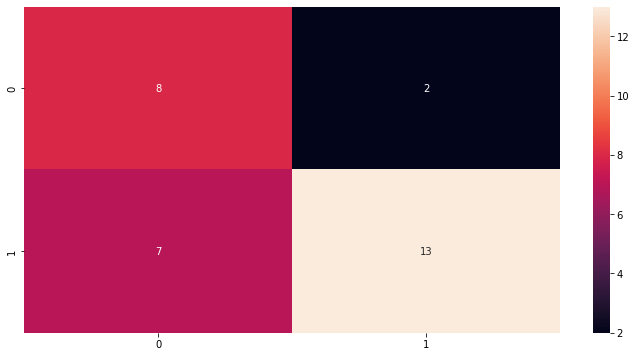

In [ ]:
sns.heatmap(cm1,annot=True)

After applying PCA to data

In [ ]:
decision_tree=DecisionTreeClassifier()
parameters={'criterion':['gini', 'entropy'],
                       'max_depth': [4, 5, 6, 7, 10, 12, 15],
                       'min_samples_split':[2, 3, 4]}
max_index_for_decision_tree=grid_search_cv(decision_tree,parameters,X_P,y,pca=True)
Maximum_Indices_with_pca['Decision_Tree']=max_index_for_decision_tree
classifier_and_performance_with_pca[decision_tree]

{'Accuracy': 0.6666666666666666,
 'Best_Parameters': {'criterion': 'gini',
  'max_depth': 5,
  'min_samples_split': 2},
 'F1-Score': 0.7222222222222222,
 'Precision': 0.6190476190476191,
 'Recall': 0.8666666666666667}

In [ ]:
best_model_pca=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=4)
best_model_pca.fit(X.iloc[Maximum_Indices_with_pca['Decision_Tree'][0]],y.iloc[Maximum_Indices_with_pca['Decision_Tree'][0]])
cm2=confusion_matrix(best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['Decision_Tree'][1]]),y.iloc[Maximum_Indices_with_pca['Decision_Tree'][1]])

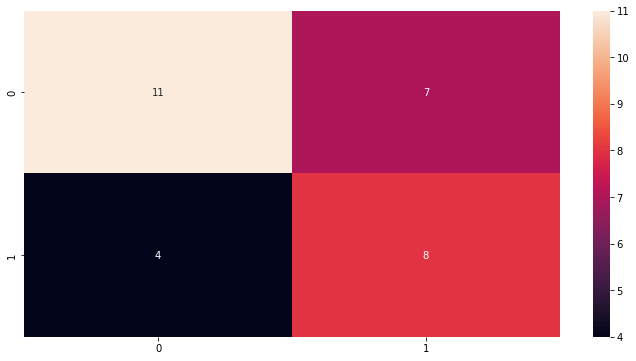

In [ ]:
sns.heatmap(cm2,annot=True)

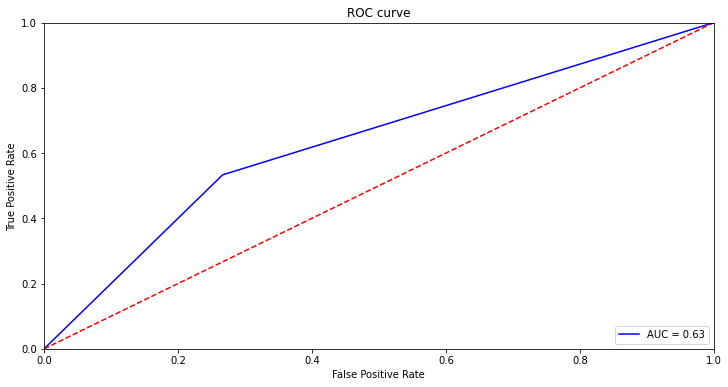

In [ ]:
y_test=list(y.iloc[Maximum_Indices_with_pca['Decision_Tree'][1]])
y_pred=best_model_pca.predict(X.iloc[Maximum_Indices_with_pca['Decision_Tree'][1]])
plot_roc_curve(y_test,y_pred)

`Comparision of Models before Applying PCA to data`
--------------------------------------------------------------------------------------

In [ ]:
comparision_before_pca=pd.DataFrame(classifier_and_performance_without_pca)

In [ ]:
comparision_before_pca['Average']=[{},sum(list(comparision_before_pca.loc['Accuracy']))/len(list(comparision_before_pca.loc['Accuracy'])),sum(list(comparision_before_pca.loc['Recall']))/len(list(comparision_before_pca.loc['Recall'])),sum(list(comparision_before_pca.loc['Precision']))/len(list(comparision_before_pca.loc['Precision'])),sum(list(comparision_before_pca.loc['F1-Score']))/len(list(comparision_before_pca.loc['F1-Score']))]

In [ ]:
comparision_before_pca

,Perceptron(),LogisticRegression(),KNeighborsClassifier(),SVC(),GaussianNB(),BernoulliNB(),DecisionTreeClassifier(),Average
Best_Parameters,"{'alpha': 0.001, 'max_iter': 100, 'penalty': '...","{'C': 10.0, 'max_iter': 100, 'penalty': 'l2'}","{'n_neighbors': 6, 'p': 2, 'weights': 'uniform'}","{'C': 10.0, 'gamma': 2.0, 'kernel': 'poly'}",{},{'alpha': 0.0},"{'criterion': 'entropy', 'max_depth': 12, 'min...",{}
Accuracy,0.633333,0.833333,0.766667,0.774194,0.633333,0.5,0.633333,0.682028
Recall,0.933333,0.866667,0.733333,0.8125,0.8,1,0.666667,0.830357
Precision,0.583333,0.8125,0.785714,0.764706,0.6,0.5,0.625,0.667322
F1-Score,0.717949,0.83871,0.758621,0.787879,0.685714,0.666667,0.645161,0.728671


`Comparision of Models after applying PCA to data`
--------------------------------------------------------------------------------------------------

In [ ]:
comparision=pd.DataFrame(classifier_and_performance_with_pca)

In [ ]:
comparision['Average']=[{},sum(list(comparision.loc['Accuracy']))/len(list(comparision.loc['Accuracy'])),sum(list(comparision.loc['Recall']))/len(list(comparision.loc['Recall'])),sum(list(comparision.loc['Precision']))/len(list(comparision.loc['Precision'])),sum(list(comparision.loc['F1-Score']))/len(list(comparision.loc['F1-Score']))]

In [ ]:
comparision

,Perceptron(),LogisticRegression(),KNeighborsClassifier(),SVC(),GaussianNB(),BernoulliNB(),DecisionTreeClassifier(),Average
Best_Parameters,"{'alpha': 1e-05, 'max_iter': 1000, 'penalty': ...","{'C': 5.0, 'max_iter': 1000, 'penalty': 'l2'}","{'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}","{'C': 10.0, 'gamma': 2.0, 'kernel': 'rbf'}",{},{'alpha': 10.0},"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",{}
Accuracy,0.8,0.766667,0.7,0.733333,0.666667,0.7,0.6,0.709524
Recall,0.933333,0.933333,0.6,0.733333,0.866667,0.933333,0.733333,0.819048
Precision,0.736842,0.7,0.75,0.733333,0.619048,0.636364,0.578947,0.679219
F1-Score,0.823529,0.8,0.666667,0.733333,0.722222,0.756757,0.647059,0.735652


# `Conclusion`
-------------------------------------------------------------------------------------------

After applying all possible models to data, it can be observed that:

1. On average, the performance metrics are comparably higher when the dimension of data is reduced using PCA.
2. Though on average the reduced data gives higher performance metrics, there were situations when the original data provided higher performance metrics. So, the best cases can be chosen according to scenario.
3. For this particular data, 
      
      * If PCA is not applied to the data, then Logistic Regression can be used for predictions since it has higher accuracy and f1-score when compared to others.
      * If PCA is applied to the data, then Perceptron can be used for predictions since it has higher accuracy and f1-score when compared to others.